<a href="https://colab.research.google.com/github/sakshiigdtuw/Python-ML-Project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Comparative Analysis of ML Algorithms and Preprocessing Techniques : A Case Study of Credit Card fraud Detection***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/creditcard.csv",index_col=0)

In [ ]:
print(data)

                 V1         V2        V3        V4        V5        V6  \
Time                                                                     
0.0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
0.0        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
1.0       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
1.0       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
2.0       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...             ...        ...       ...       ...       ...       ...   
172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

                V7        V8        V

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284807 entries, 0.0 to 172792.0
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     284

isnull() function is used to have null values in the data. shape() -> rows and cols of data

In [ ]:
data.isnull().sum();
data.duplicated().sum()

9144

In [ ]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

<ipython-input-56-71499da3b590>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


Text(0, 0.5, 'Frequency')

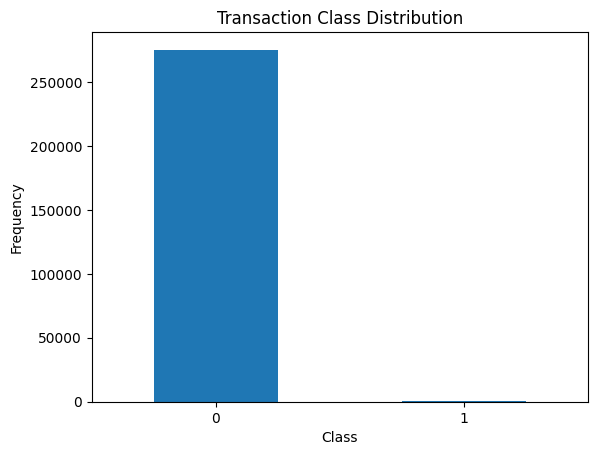

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

***Kdeplot shows the distribution of observations in a dataset***.
Here,it shows that distribution of fraud and genuine data is highly uneven.

<Axes: xlabel='Class', ylabel='Density'>

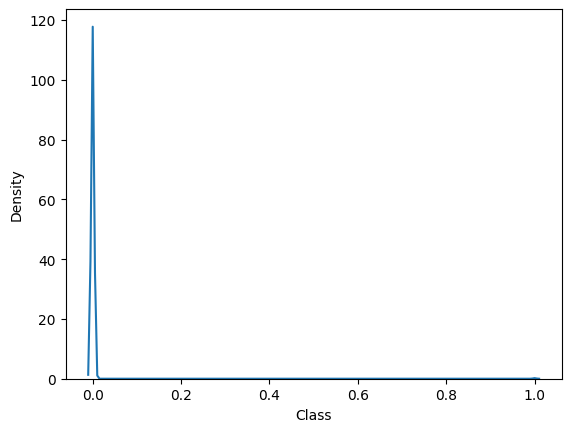

In [ ]:
sns.kdeplot(data['Class'])

***Feature Scaling***-rescaling of data to get an evenly distrubed data for further computations


*   Standardization
*   Normalization



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

data.describe().round(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,275663.000,275663.000,275663.000,275663.000,275663.000,275663.000,275663.000,275663.000,275663.000,275663.000,...,275663.000,275663.000,275663.000,275663.000,275663.000,275663.000,275663.000,275663.000,275663.000,275663.000
mean,-0.037,-0.002,0.026,-0.004,-0.011,-0.014,0.009,-0.006,-0.012,0.003,...,0.003,0.006,-0.002,-0.007,-0.005,-0.000,0.002,0.001,90.578,0.002
std,1.953,1.667,1.508,1.424,1.378,1.313,1.240,1.192,1.100,1.087,...,0.733,0.726,0.631,0.606,0.524,0.484,0.401,0.333,253.214,0.041
min,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,-24.588,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,-0.941,-0.614,-0.843,-0.863,-0.700,-0.766,-0.552,-0.210,-0.660,-0.539,...,-0.225,-0.532,-0.165,-0.361,-0.324,-0.328,-0.072,-0.053,6.300,0.000
50%,-0.060,0.070,0.201,-0.035,-0.061,-0.271,0.045,0.023,-0.065,-0.092,...,-0.026,0.013,-0.014,0.038,0.010,-0.057,0.003,0.012,23.740,0.000
75%,1.294,0.819,1.048,0.754,0.605,0.388,0.584,0.322,0.593,0.471,...,0.189,0.534,0.145,0.433,0.347,0.244,0.095,0.081,79.910,0.000
max,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,23.745,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


In [ ]:
new_data = pd.DataFrame(data,columns = ['Amount' , 'Class'])

scaler = MinMaxScaler() #Instatiating the MinMaxScaler() function
normalized_data = scaler.fit_transform(new_data) #Fit and transform
print("Normalized data")
print(normalized_data,"\n")

print("Standardized data\n")
scaler = StandardScaler()
standardized_data = scaler.fit_transform(new_data)
print(standardized_data)

Normalized data
[[0.00582379 0.        ]
 [0.00010471 0.        ]
 [0.01473892 0.        ]
 ...
 [0.00264215 0.        ]
 [0.00038924 0.        ]
 [0.00844649 0.        ]] 

Standardized data

[[ 0.23316933 -0.04145856]
 [-0.34709201 -0.04145856]
 [ 1.13770248 -0.04145856]
 ...
 [-0.08964127 -0.04145856]
 [-0.31822309 -0.04145856]
 [ 0.49926889 -0.04145856]]


***OUTLIERS***

In [ ]:
import statistics
def find_anomaly(data):
  anomalies = []

  random_data_std = statistics.stdev(data)
  random_data_mean = statistics.mean(data)

  anomaly_cut_off = random_data_std * 3

  lower_limit = random_data_mean - anomaly_cut_off
  upper_limit = random_data_mean + anomaly_cut_off

  # Generate Outliers

  for outlier in data:
    if outlier > upper_limit or outlier < lower_limit:
      anomalies.append(outlier)

  return anomalies

In [ ]:
list = find_anomaly(data['Amount'])
len(list)

3959

In [ ]:
len(data)

275663

From the above find_anomaly function we can compute the outliers proportion in our data.we have 1.436% outliers in our data.

In [ ]:
#get correlations of each features in dataset
corr_data=data.corr()

<Axes: >

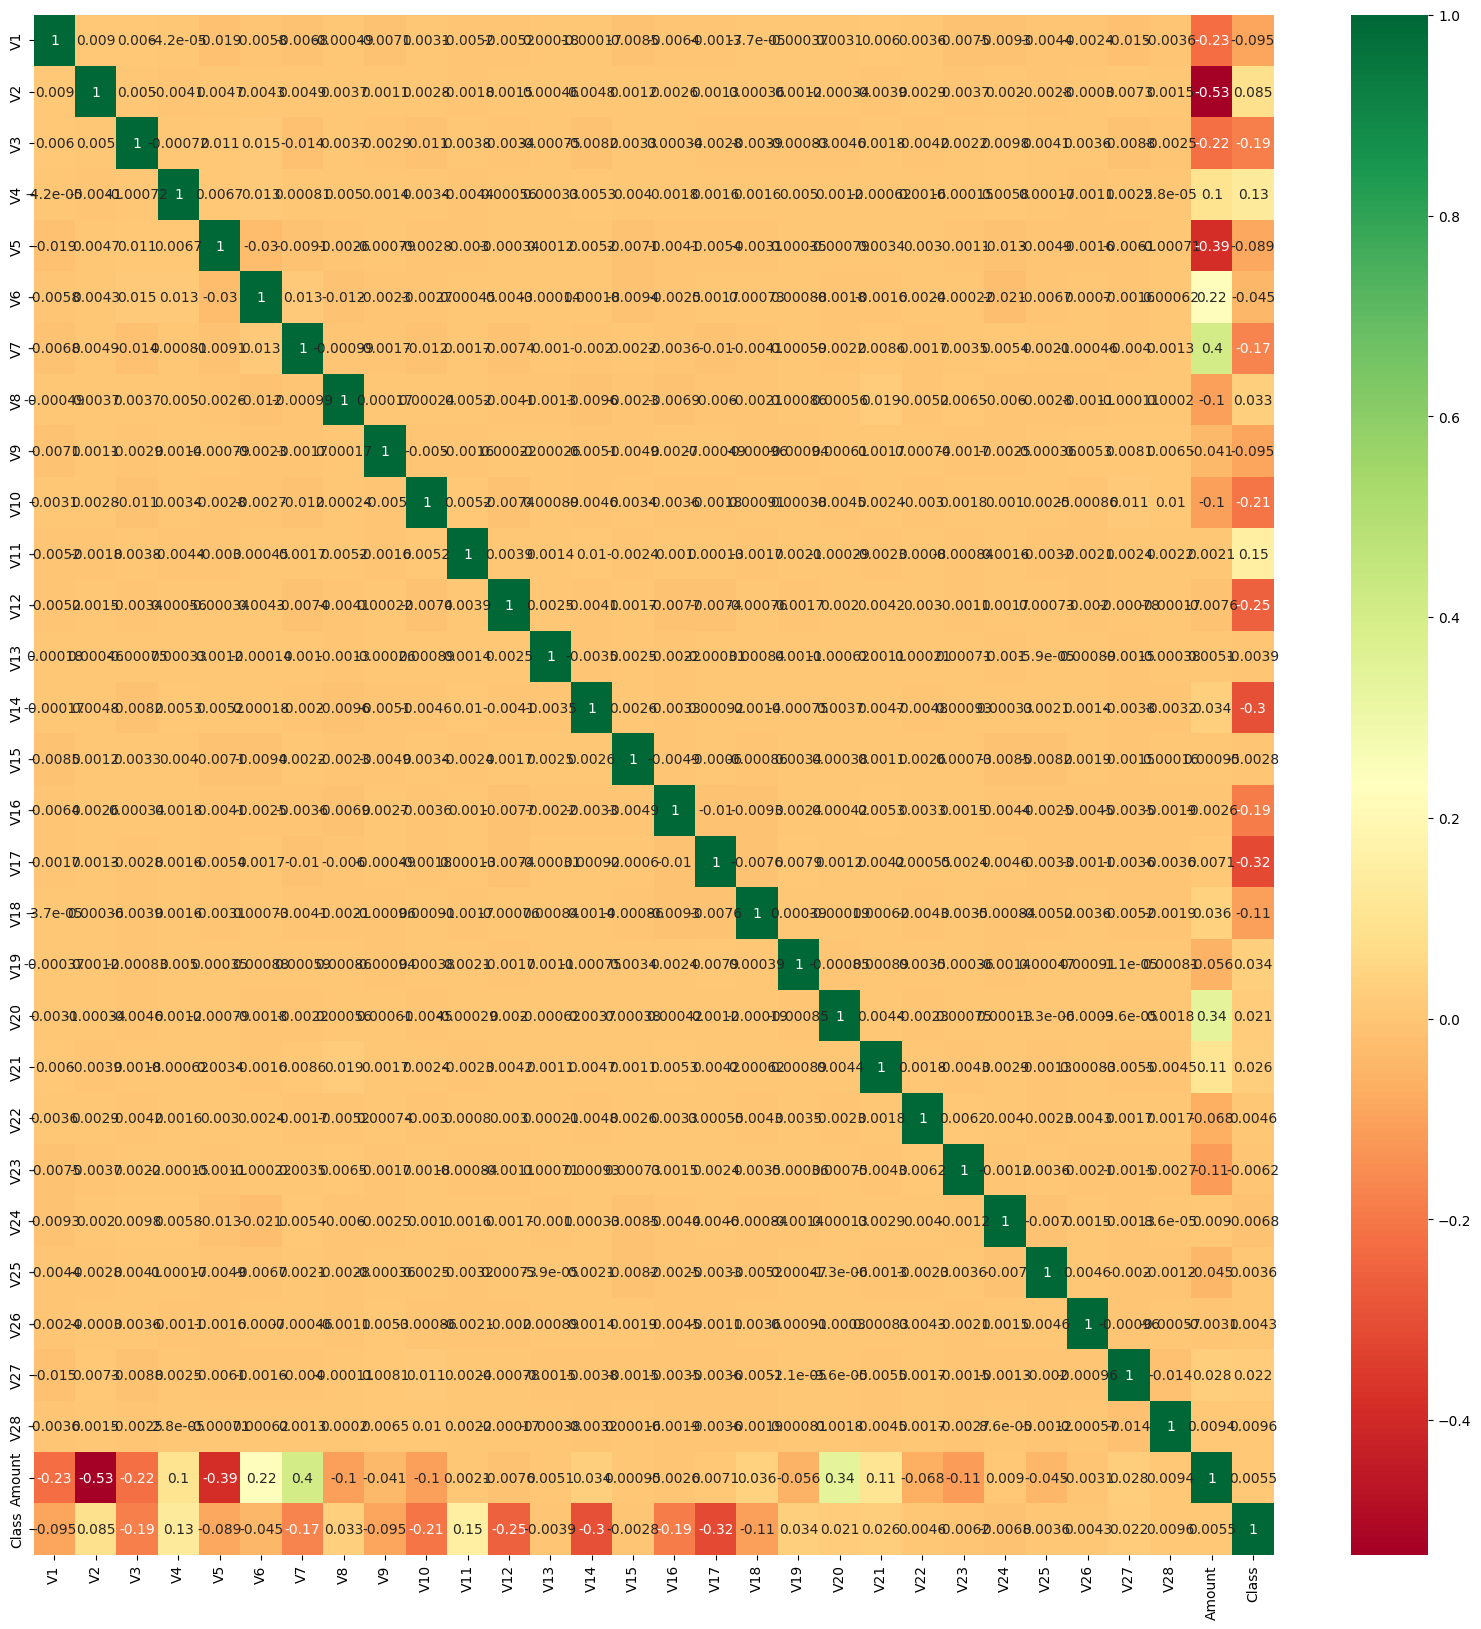

In [ ]:
corr_features = corr_data.index
plt.figure(figsize=(20,20))
sns.heatmap(data[corr_features].corr(),cmap="RdYlGn",annot=True)

This heatmap shows that amount is an important factor.

*  Because Most the variation are seen in amount and class section



In our dataset , **0 defines Valid Transactions** and **1 define Invalid(fraud)
 Transactions**.

In [ ]:
data.Class.value_counts()

,count
Class,
0,275190
1,473


In [ ]:
valid_data = data[data['Class'] == 0]

In [ ]:
fraud_data = data[data['Class'] == 1]

In [ ]:
print(fraud_data.shape,valid_data.shape)

(473, 30) (275190, 30)


In [ ]:
valid_data.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,
-56.407510,-72.715728,-6.605265,16.491217,34.801666,-26.160506,-19.399981,-1.501300,6.967698,9.537780,3.089395,1.776452,3.732744,-2.530792,5.784514,3.903988,-1.929314,0.206699,2.805883,-12.360962,-6.266878,-1.272167,7.893082,0.767805,5.376595,0.163672,-8.358317,33.847808,1201.83,0,1
1.155879,-0.002936,1.137369,1.196192,-0.703483,0.256148,-0.661167,0.225676,0.449058,0.085785,0.727481,1.019232,0.269716,-0.126588,-0.117184,0.565866,-0.803086,0.777650,-0.072113,-0.108520,0.153269,0.602993,-0.139418,0.037418,0.528381,-0.240074,0.065744,0.022142,1.00,0,1
1.155800,-0.202747,0.665668,-0.096603,-0.894345,-0.817438,-0.274852,-0.028265,0.155863,-0.053439,1.613046,0.847001,-0.238005,0.397513,0.567870,0.558960,-0.524231,0.047495,0.230781,-0.004052,-0.049751,-0.261731,0.080631,0.580457,0.038010,0.871858,-0.082684,0.006971,38.34,0,1
1.155804,-0.499252,0.997408,0.076483,-1.033943,0.119343,-0.761594,0.236858,1.022017,-0.280407,0.545638,0.961966,-0.414435,-0.301635,-0.937386,0.192165,-0.205066,0.012508,0.876843,-0.042122,-0.196965,-0.400076,0.014393,0.062739,0.131148,0.945199,-0.043770,0.003171,27.00,0,1
1.155816,0.155069,0.353470,0.589284,-0.357534,-0.429718,-0.190829,0.153173,-0.020485,-0.114493,1.782672,0.288005,-1.395386,0.244255,0.793032,0.392732,0.180744,-0.137319,-0.333582,-0.203918,-0.212269,-0.686734,0.189729,0.143406,0.036142,0.099084,-0.019731,0.016024,1.29,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.664949,1.327789,0.707282,-0.399885,0.702152,-0.004025,0.617522,0.064919,-0.461823,0.052090,0.642870,0.759326,1.224489,-0.604056,0.194238,0.839343,-0.737750,0.591371,0.605241,0.334301,-0.291025,-0.734325,-0.170530,-0.878757,0.037219,0.115824,0.215305,0.145356,3.99,0,1
-0.664947,0.304280,0.803210,-2.686838,1.118795,0.807403,0.571805,0.198440,-1.752510,-0.465145,-0.113398,-0.487653,0.748657,-0.196804,0.516946,0.126542,0.727296,-2.683524,-1.227166,0.019268,0.512884,1.462134,-0.549800,-0.268857,0.904520,0.173104,0.023306,0.025065,10.00,0,1
-0.664938,0.355745,-1.345607,-1.698051,3.193367,3.265099,0.374476,0.900453,0.019020,-0.104056,-0.319451,0.051936,-0.411841,0.302480,-0.250773,-0.380018,-0.397924,-0.844021,-0.109623,0.170764,-0.196152,-0.402290,0.136187,0.711228,-0.733671,0.181925,0.533458,0.354618,39.12,0,1


In [ ]:
fraud_data.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,
-30.552380,16.713389,-31.103685,6.534984,-22.105532,-4.977692,-20.371514,20.007208,-3.565738,-7.731071,3.829427,-5.314332,1.446930,-4.579264,-0.142299,-4.997848,-10.961410,-4.641482,0.567056,1.733644,1.816520,-2.288686,-1.460544,0.183179,2.208209,-0.208824,1.232636,0.356660,99.99,1,1
-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,-0.912189,-2.961996,2.778968,-2.379600,0.918963,-4.015787,-0.530010,-2.815888,-6.649358,-1.746113,1.083407,0.168891,0.641594,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,204.27,1,1
-0.967767,2.098019,-5.222929,6.514573,-4.187674,2.114178,0.948701,-2.448427,-3.203666,-3.074034,1.051486,-3.474863,0.573371,-5.254253,-0.326388,-1.848598,-2.421536,-0.833345,0.952141,1.147204,-0.843268,0.796739,1.314312,-0.352887,-1.770706,0.098133,0.956769,0.162777,925.31,1,1
-1.000611,3.346850,-5.534491,6.835802,-0.299803,0.095951,-2.440419,1.286301,-2.766438,-4.458008,4.696533,-8.762113,0.985827,-7.320272,-1.063840,-3.371125,-4.251158,-0.430057,1.804013,1.189814,0.439757,-0.694099,0.299660,-0.657601,0.101648,0.430457,0.824685,0.326952,186.13,1,1
-1.020632,1.496959,-4.490937,1.836727,0.627318,-2.735569,-1.546274,0.459822,-0.682741,-4.363102,4.287021,-5.403768,1.260262,-3.087743,-1.317488,-3.537056,-3.172028,-0.529885,1.011626,0.443489,0.773631,0.860618,-0.304666,-0.155500,0.412166,-0.220080,0.392338,-0.020089,22.04,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4.384221,3.264665,-3.077158,3.403594,-1.938075,-1.221081,-3.310317,-1.111975,-1.977593,-3.288204,2.886091,-6.848978,-1.029235,-7.460103,0.055906,-4.334783,-9.874560,-3.541903,-0.531559,-0.141533,2.076383,-0.990303,-0.330358,0.158378,0.006351,-0.493860,-1.537652,-0.994022,45.64,1,1
-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,1
-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,-7.781353,6.283377,-9.656606,-1.619135,-10.732109,0.288221,-7.898122,-13.570683,-4.590235,2.590173,-0.562264,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,648.00,1,1


In [ ]:
f = 473
n=275190
unbalanced_percent = (f*100)/n
print(unbalanced_percent)

0.1718812456847996


The unbalanced_percent is 0.172 which shows our dataset is unbalanced

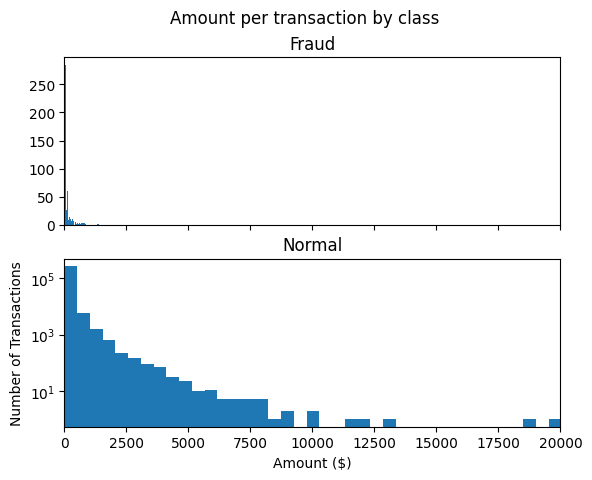

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud_data.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(valid_data.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [ ]:
new_valid_data = valid_data.sample(n = 473)

Concatenating datasets of 473 rows of valid and fraud  data.

In [ ]:
dataset = pd.concat([new_valid_data,fraud_data],axis=0)

In [ ]:
dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
27453.0,-0.639098,1.491897,1.203562,2.834046,-0.078692,0.495723,0.021975,0.653690,-0.925322,0.544267,...,-0.200108,-0.486077,-0.146371,-0.501105,-0.107355,0.190398,0.256070,0.124085,3.78,0
66938.0,-1.919673,2.139709,-2.219134,0.212075,0.400080,5.307919,-1.992063,-3.578978,-1.042428,-1.448221,...,-2.622357,0.599418,0.416328,0.981270,0.015641,-0.342727,0.049144,-0.045668,226.98,0
61234.0,-1.095733,-0.936379,1.123617,-0.795855,-0.050762,-0.693851,-0.128866,-0.040617,-1.540229,0.687472,...,0.423835,0.959822,0.008877,0.045759,-0.027912,-0.053084,-0.041616,0.263589,118.58,0
58404.0,-1.390263,2.069431,0.077908,0.997642,-0.960261,0.510806,-1.843779,-4.812426,-1.468626,-1.210160,...,-2.289690,1.364568,0.405782,0.504796,-0.333601,-0.389014,-0.082486,0.026808,59.37,0
75005.0,-0.303501,0.650272,-0.491804,-2.073141,0.262044,-0.592300,0.272650,0.293771,-1.747735,0.331945,...,0.347305,0.909104,-0.151448,-0.803777,-0.474357,-0.367417,0.303184,0.195003,10.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1


In [ ]:
x = dataset.drop(['Class'],axis=1)

In [ ]:
y = dataset.Class

***DATASET SPLITTING***

20% data -> testing ; 80% data -> training.
stratify operation for ensuring unbiased data using y dataset because it contain 0/1.
Random state is used to reproduce the new dataset.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(756, 29) (190, 29) (756,) (190,)


In [ ]:

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTETomek


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter
    'K-Nearest Neighbours': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    #'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [ ]:
sampling_techniques = {
    'Normal': None,
    'Random Oversampling': RandomOverSampler(random_state=42),
    'SMOTE Oversampling': SMOTE(random_state=42),
    'Random Undersampling': RandomUnderSampler(random_state=42),
    'Tomek Links Undersampling': TomekLinks(),
    'Cluster Centroids Undersampling': ClusterCentroids(random_state=42),
    'SMOTE + Tomek Links': SMOTETomek(random_state=42)
}

In [ ]:
from sklearn.metrics import roc_curve , auc
fpr , tpr , thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = auc(fpr , tpr)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



def evaluate_models(models, sampling_techniques, x_train, y_train, x_test, y_test):
    results = []

    for sampling_name, sampler in sampling_techniques.items():
        if sampler:
            x_res, y_res = sampler.fit_resample(x_train, y_train)
        else:
            x_res, y_res = x_train, y_train

        for model_name, model in models.items():
            model.fit(x_res, y_res)
            y_pred = model.predict(x_test)
            auc_score = roc_auc_score(y_test, y_pred)
            results.append({
                'Model': model_name,
                'Sampling Technique': sampling_name,
                'AUC': auc_score
            })

    return pd.DataFrame(results)
# Your evaluate_models function and the rest of the code
results_df = evaluate_models(models, sampling_techniques, x_train, y_train, x_test, y_test)
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                   Model               Sampling Technique       AUC
0    Logistic Regression                           Normal  0.936842
1   K-Nearest Neighbours                           Normal  0.926316
2          Decision Tree                           Normal  0.926316
3          Random Forest                           Normal  0.942105
4    Logistic Regression              Random Oversampling  0.936842
5   K-Nearest Neighbours              Random Oversampling  0.926316
6          Decision Tree              Random Oversampling  0.926316
7          Random Forest              Random Oversampling  0.942105
8    Logistic Regression               SMOTE Oversampling  0.936842
9   K-Nearest Neighbours               SMOTE Oversampling  0.926316
10         Decision Tree               SMOTE Oversampling  0.926316
11         Random Forest               SMOTE Oversampling  0.936842
12   Logistic Regression             Random Undersampling  0.936842
13  K-Nearest Neighbours             Random Unde

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

To check underfitting/overfitting issue we can judge it with large scale variation in training and testing dataset.

In [ ]:
x_train_predict = model.predict(x_train)

In [ ]:
from sklearn import metrics

In [ ]:
accuracy_based_train = metrics.accuracy_score(x_train_predict,y_train)

In [ ]:
accuracy_based_train

0.9404761904761905

In [ ]:
x_test_predict = model.predict(x_test)

In [ ]:
accuracy_based_test = metrics.accuracy_score(x_test_predict,y_test)

In [ ]:
accuracy_based_test

0.9421052631578948

**Accuracy based on training dataset** =>**94.04%**

**Accuracy based on testing dataset** =>**94.21%**

As the dataset is almost nearby thus,there is no overfitting and underfitting in dataset.

***CLASSIFICATION ALGORITHMS***

In [ ]:
classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machine' : SVC(),
    'Naive Bayes' : GaussianNB()
}

In [ ]:
# Training and evaluating classifiers
result = {}
for name, clf in classifiers.items():
     clf.fit(x_train, y_train)
     y_pred = clf.predict(x_test)
     cm = confusion_matrix(y_test, y_pred)
     print(f"{name} Confusion Matrix:\n",cm)
     accuracy = accuracy_score(y_test, y_pred)
     result[name] = accuracy
     print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}\n")
     print(f"{name} Accuracy: {accuracy *100:.4f} % ")
     print(f"{name} Classification Report:\n",classification_report(y_test, y_pred))
     print('------------------------------------------------------------------------------------------')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Confusion Matrix:
 [[94  1]
 [10 85]]
Logistic Regression Accuracy: 0.9421052631578948

Logistic Regression Accuracy: 94.2105 % 
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        95
           1       0.99      0.89      0.94        95

    accuracy                           0.94       190
   macro avg       0.95      0.94      0.94       190
weighted avg       0.95      0.94      0.94       190

------------------------------------------------------------------------------------------
K-Nearest Neighbors Confusion Matrix:
 [[92  3]
 [11 84]]
K-Nearest Neighbors Accuracy: 0.9263157894736842

K-Nearest Neighbors Accuracy: 92.6316 % 
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        95
           1       0.97      0.88      0.92        95

    accuracy                    

In [ ]:
best_classifier = max(result, key=result.get)
print(f"The Best classifier is {best_classifier} with an accuracy of {result[best_classifier] * 100:.3f}%")

The Best classifier is Logistic Regression with an accuracy of 94.211%


ROC_Curve function calculates the TPR and FPR at various thresholds and AUC function calculates the area under the ROC curve.
ROC Curve: A plot that shows the trade-off between TPR and FPR across different thresholds.
AUC ranges from 0.5(random guessing) to 1 (perfect classifier), with higher valus indicating better classifier performances.

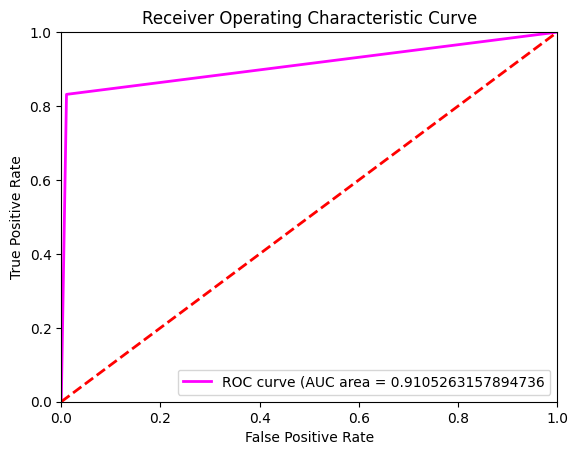

In [ ]:
# Calculate ROC Curve
fpr , tpr , thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = auc(fpr , tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr , color='magenta',lw=2,label=f'ROC curve (AUC area = {roc_auc}')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

 ***DECISION TREE***

In [ ]:
param_grid = {
    'max_depth' : [None,3,4,5,6,7,8,9,10],
    'min_samples_split' : [2,5,7],
    'min_samples_leaf' : [1,2,3],
    'criterion' : ['gini','entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=40)
grid_search = GridSearchCV(decision_tree,param_grid,cv=5,scoring='accuracy',verbose=1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 7]},
             scoring='accuracy', verbose=1)

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters: ", best_params)
print("Best Model: ", best_model)

Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Model:  DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=40)


In [ ]:
# prediction on test set
y_pred = best_model.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Accuracy:  {accuracy *100:.3f}%")
print(f"Precision:  {precision *100:.3f}%")
print(f"Recall:  {recall *100:.3f}%")
print(f"F1 Score:  {f1 *100:.3f}%")
print("Confusion Matrix: \n", conf_matrix)


Accuracy:  92.632%
Precision:  92.802%
Recall:  92.632%
F1 Score:  92.624%
Confusion Matrix: 
 [[91  4]
 [10 85]]


In [ ]:
from sklearn.tree import plot_tree

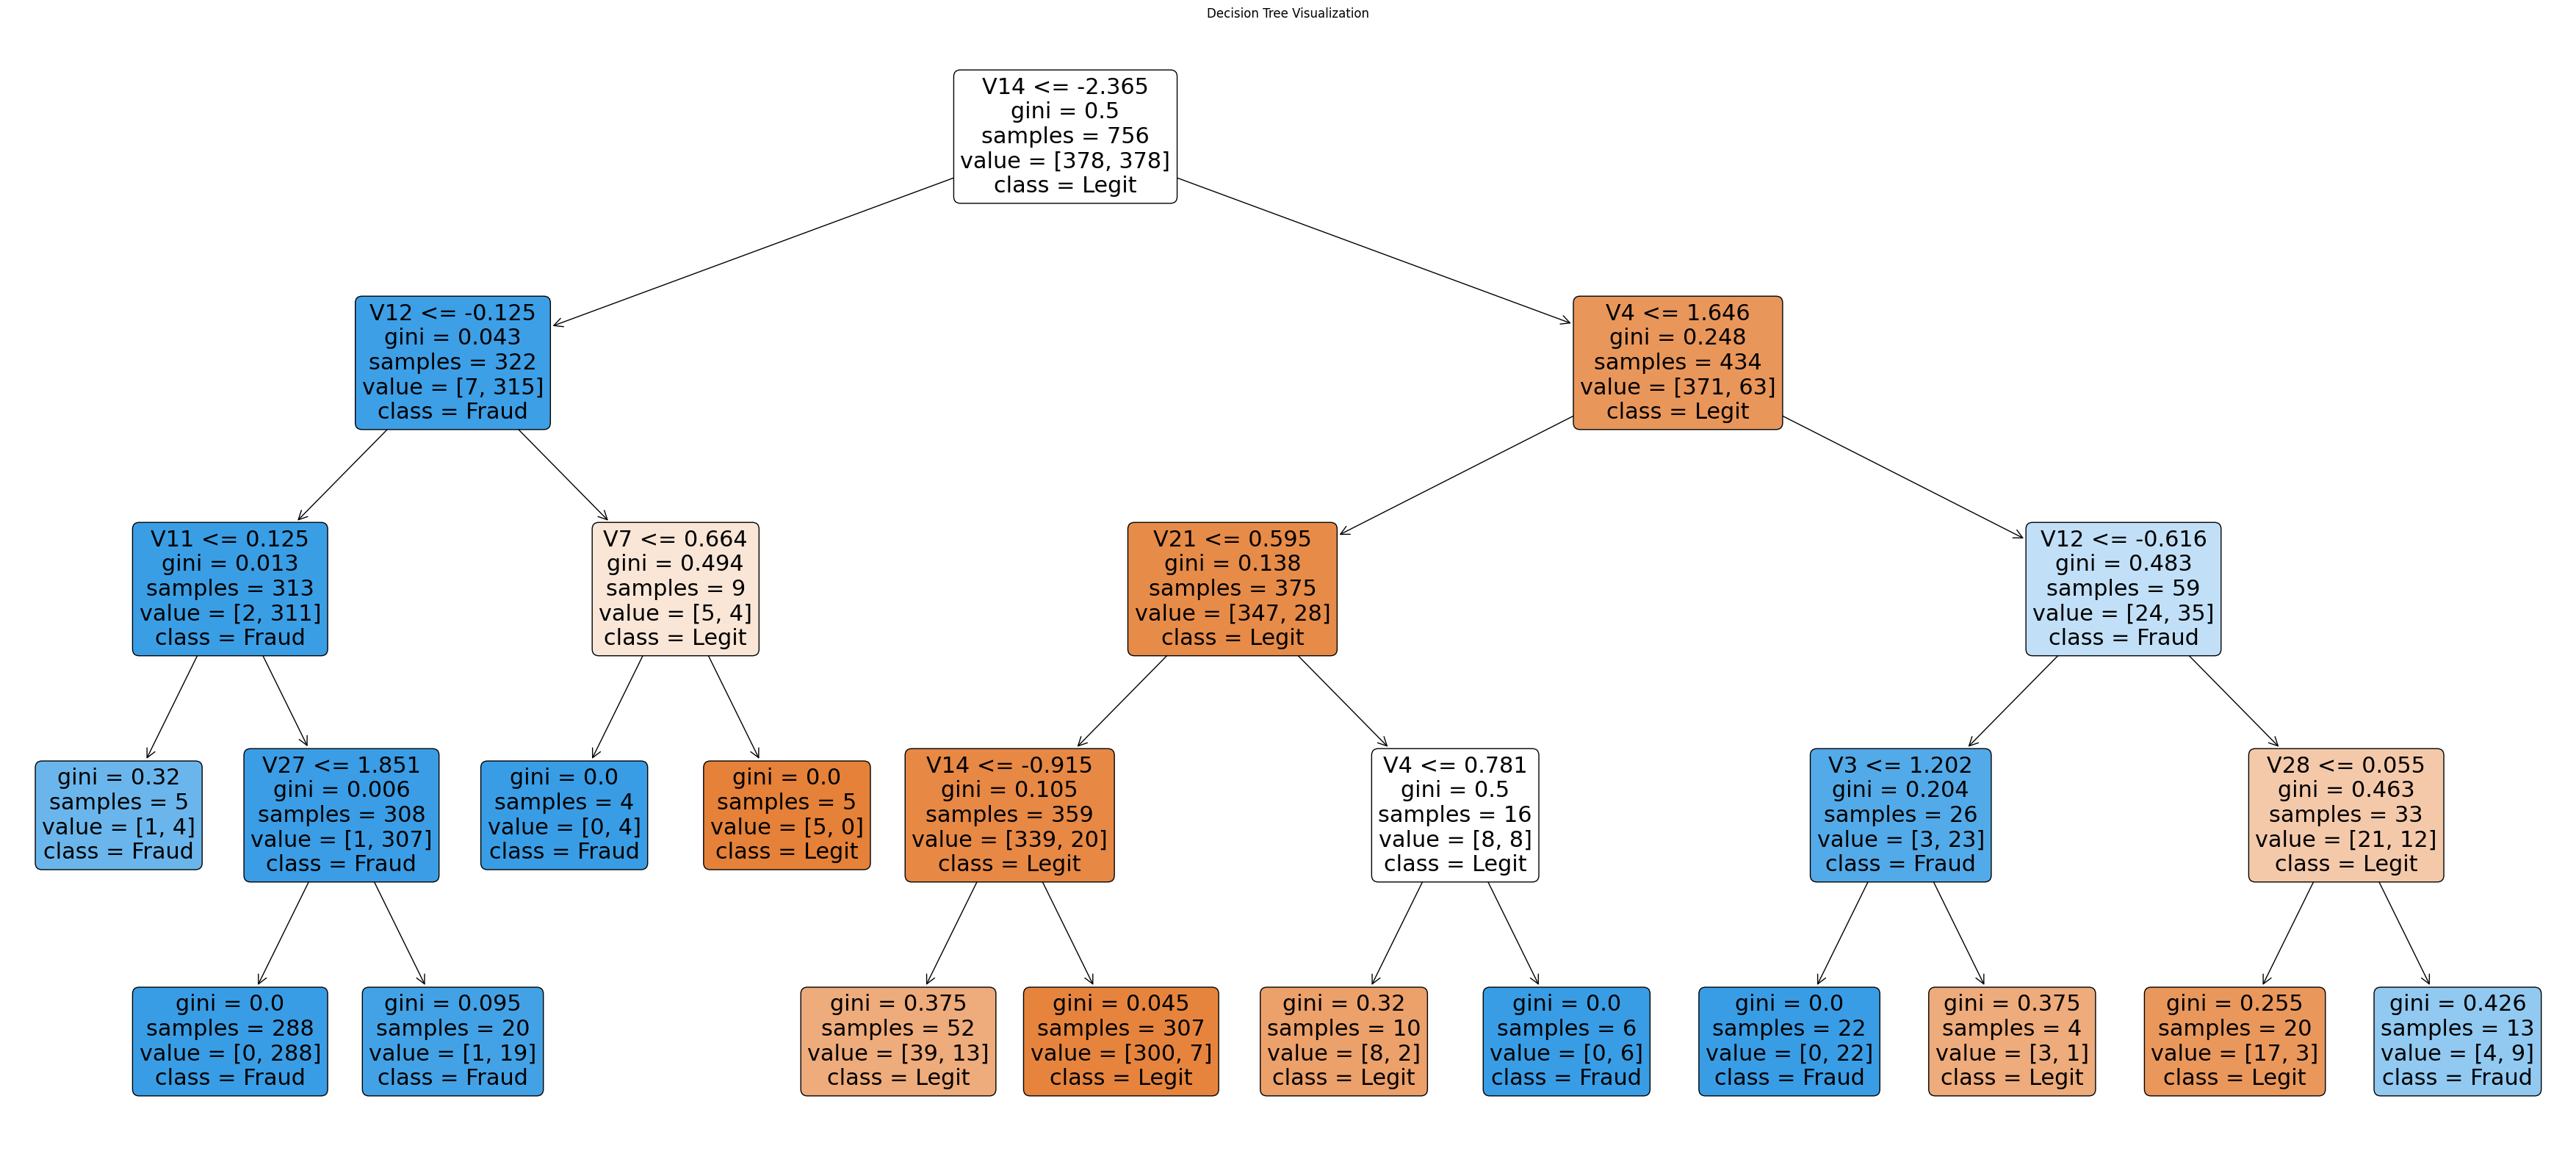

In [ ]:
best_model = grid_search.best_estimator_

# Plot decision tree
plt.figure(figsize=(45,20))
plot_tree(best_model,filled=True,rounded=True,feature_names=x_train.columns,class_names=['Legit','Fraud'])
plt.title("Decision Tree Visualization")
plt.show()

***ADA BOOSTING***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initalize base Decision Tree classifier
base_decision_tree = DecisionTreeClassifier(max_depth=3 , random_state=40)

# Initialize AdaBoost classifier with Decision Tree as base estimator
adaboost_clf = AdaBoostClassifier(base_estimator=base_decision_tree, n_estimators=100, random_state=40)

# Train the AdaBoost classifier
adaboost_clf.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=40),
                   n_estimators=100, random_state=40)

In [ ]:
# Predict on test set
y_pred = adaboost_clf.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy *100:.3f}")
print(f"Precision: {precision *100:.3f}")
print(f"Recall: {recall *100:.3f}")
print(f"F1 Score: {f1 *100:.3f}")
print("Confusion Matrix: \n", conf_matrix)

Accuracy: 92.105
Precision: 92.222
Recall: 92.105
F1 Score: 92.100
Confusion Matrix: 
 [[90  5]
 [10 85]]


In [ ]:
adaboost_clf.feature_importances_

array([0.02536098, 0.03263756, 0.03203422, 0.0519556 , 0.01147926,
       0.02809937, 0.01876807, 0.0410525 , 0.02471006, 0.03269042,
       0.05406556, 0.04874717, 0.04300368, 0.06519039, 0.03857722,
       0.04062637, 0.02052097, 0.03827121, 0.03636674, 0.03805796,
       0.01157222, 0.04051924, 0.02432632, 0.03356456, 0.03249687,
       0.03643876, 0.02716822, 0.03075919, 0.04093931])

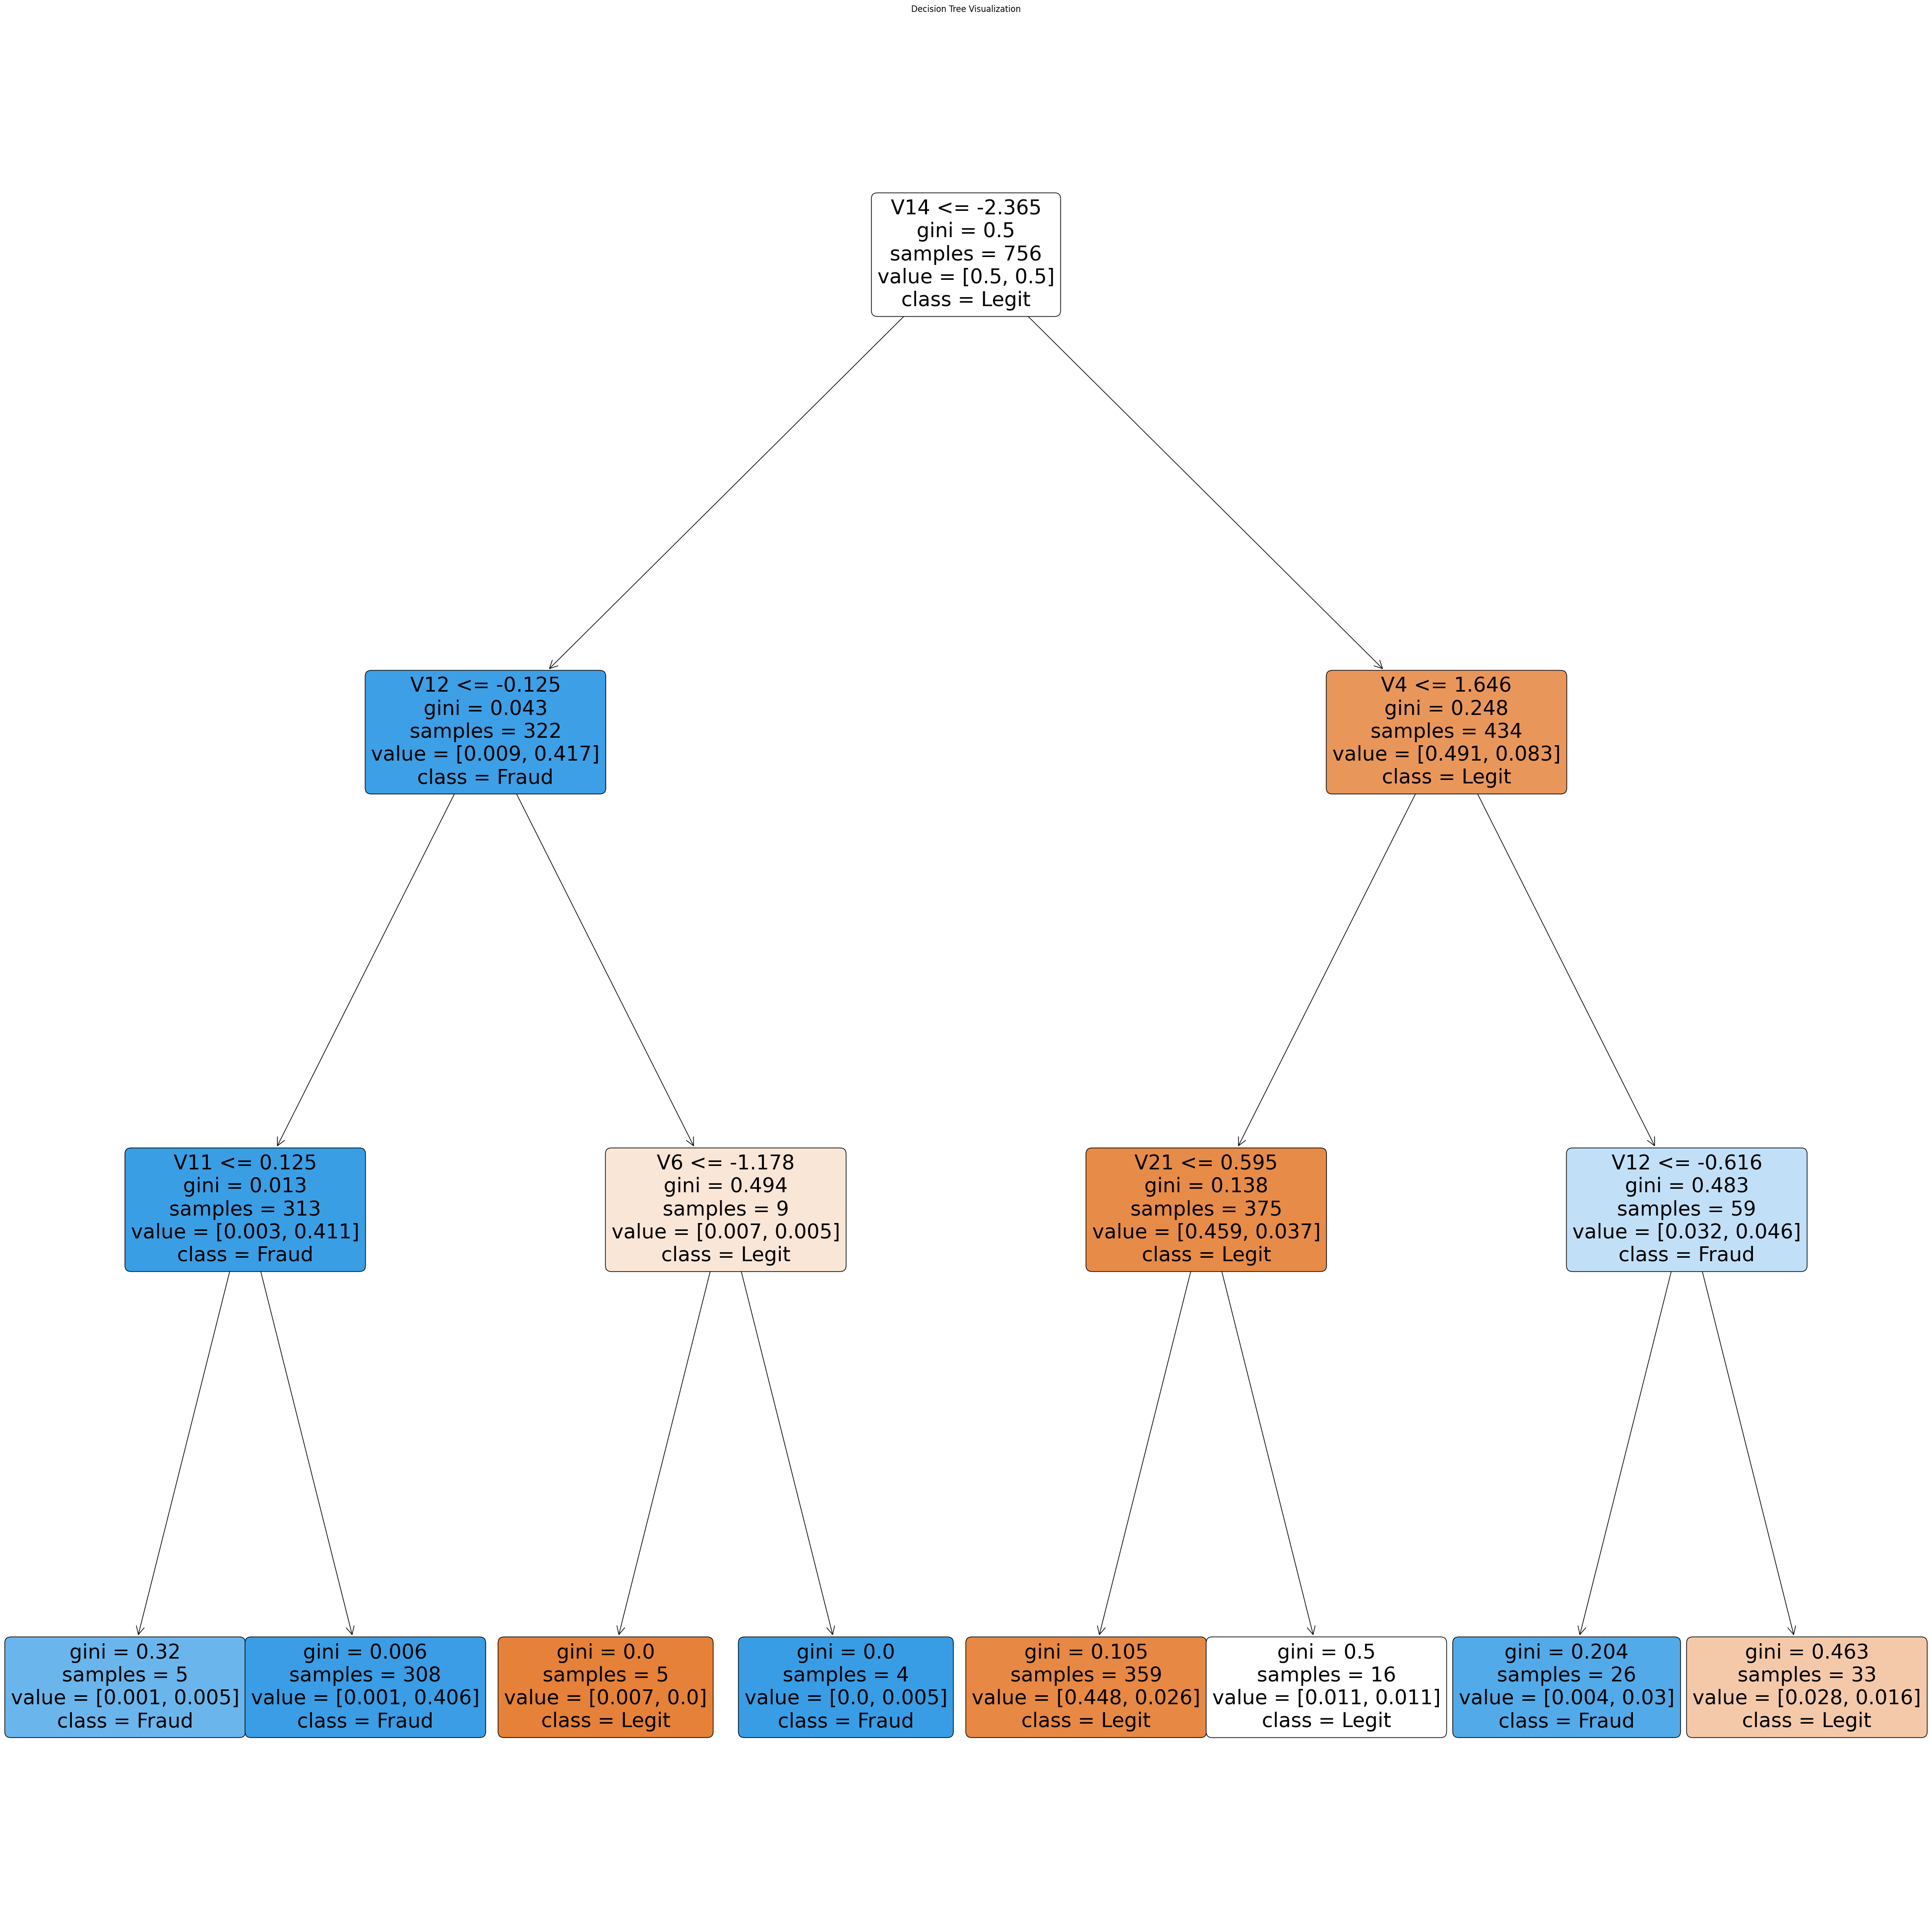

In [ ]:
plt.figure(figsize=(50,50))
plot_tree(adaboost_clf.estimators_[0],filled=True,rounded=True,feature_names=x_train.columns,class_names=['Legit','Fraud'])
plt.title("Decision Tree Visualization")
plt.show()

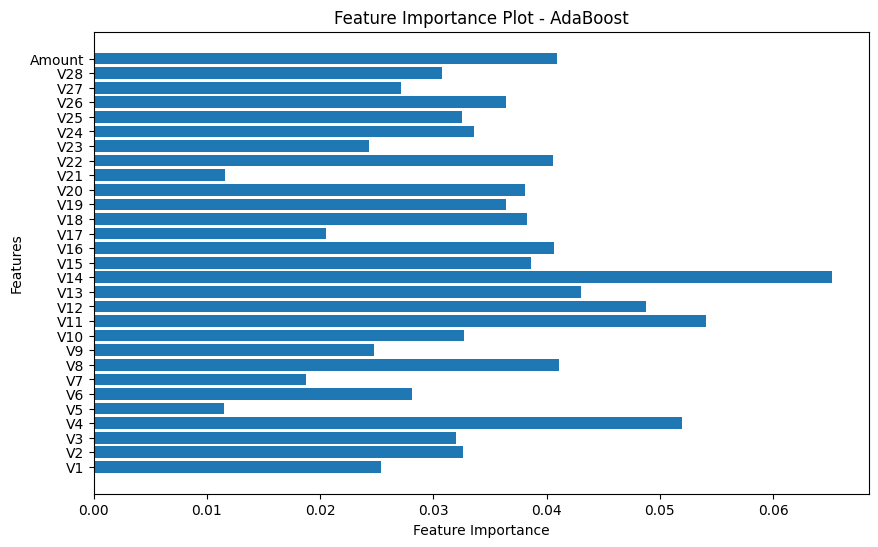

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(x_train.columns, adaboost_clf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot - AdaBoost')
plt.show()